<a href="https://colab.research.google.com/github/vn322/Synergy_DBM_301_CS/blob/main/Keras4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Метод обратного распространения ошибки

Сегодня обсудим:
1. Правило цепочки для взятия производной сложной функции
2. Как получаются градиенты для обучения нейронной сети с одним элементов на вход
3. Как получаются градиенты для обучения нейронной сети с несколькими элементами на вход


Метод используется для эффективного обучения нейронной сети с помощью правила цепочки (chain rule) (правила дифференцирования сложной функции).

<img src='https://drive.google.com/uc?id=1Qx71h2FmXS6uKHmhcIKtp49G5nqMncWK'>

После каждого прохода по сети в прямом направлении (прямой проход, forward pass, от входов к выходам) идет проход в обратную сторону (обратный проход, backward pass, от выходов ко входам) и происходит изменение параметров модели (веса и смещения).

Так что метод обратного распространения ошибки нужен для обучения нейронной сети.

## Правило цепочки (chain rule)

$$f(x) = x ^ 2$$


$$g(x) = 4 + 5x$$

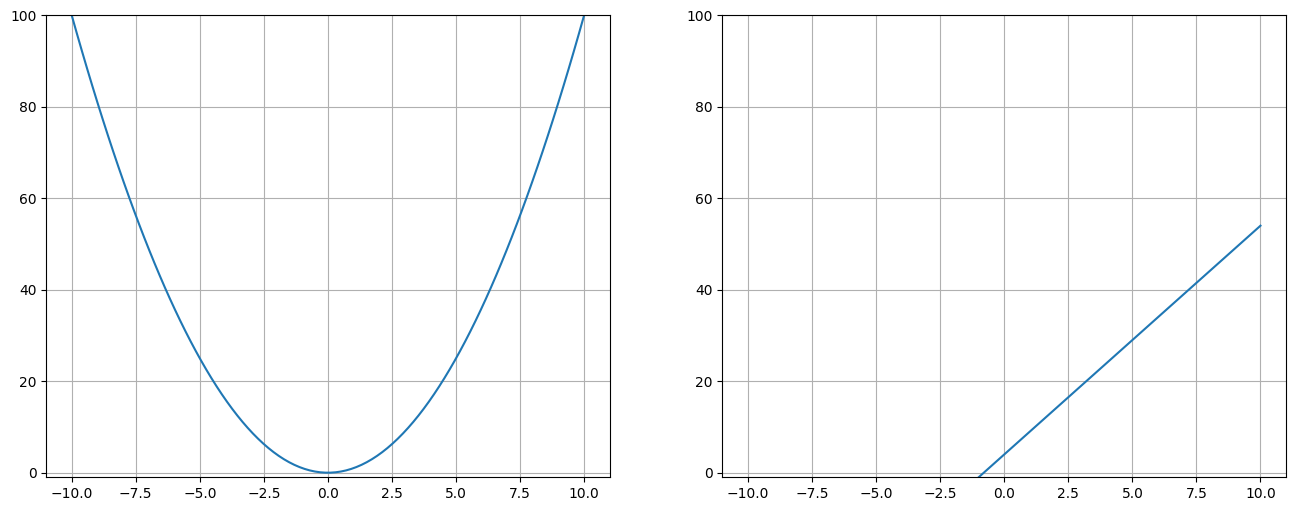

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def f(x):
    return x ** 2

def g(x):
    return 4 + 5 * x


fig, ax = plt.subplots(1, 2, figsize=(16, 6))
x = np.linspace(-10, 10, num=100)
ax[0].plot(x, f(x))
ax[0].grid()
ax[0].set_ylim(-1, 100)
ax[1].plot(x, g(x))
ax[1].set_ylim(-1, 100)
ax[1].grid();    

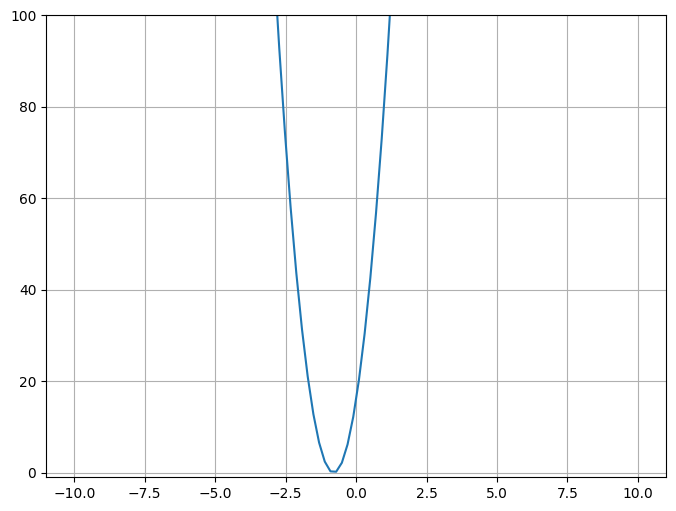

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(x, f(g(x)))
plt.ylim(-1, 100)
plt.grid();

$$f(x) = x ^ 2$$
$$\frac{∂f}{∂x} = 2x$$

<br>
<br>

$$g(x) = 40 + 5x$$
$$\frac{∂g}{∂x} = 5$$

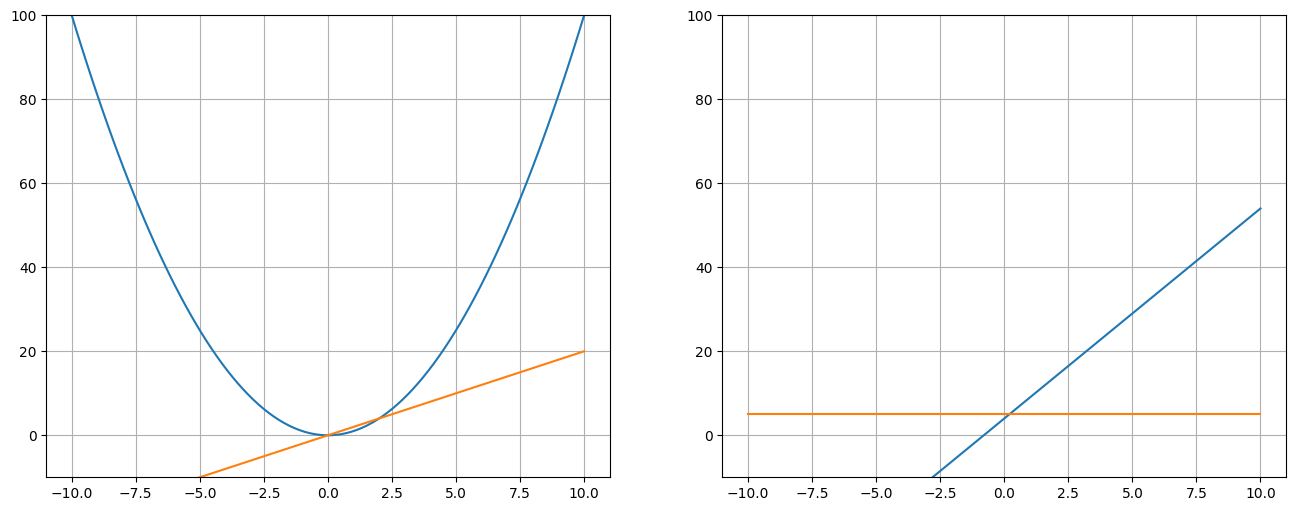

In [ ]:
def deriv_f(x):
    return 2 * x

def deriv_g(x):
    return np.ones_like(x) * 5


fig, ax = plt.subplots(1, 2, figsize=(16, 6))
x = np.linspace(-10, 10, num=100)
ax[0].plot(x, f(x))
ax[0].plot(x, deriv_f(x), label='deriv f')
ax[0].grid()
ax[0].set_ylim(-10, 100)
ax[1].plot(x, g(x))
ax[1].plot(x, deriv_g(x), label='deriv g')
ax[1].set_ylim(-10, 100)
ax[1].grid();    

$$f(g(x)) = (4 + 5x) ^ 2$$
$$f(g(x)) = \frac{∂f}{∂g} \frac{∂g}{∂x} = 2 (4 + 5x) \cdot 5 = 10 (4 + 5x) = 50x + 40$$

In [ ]:
def deriv_f_g(x):
    return 50 * x + 40

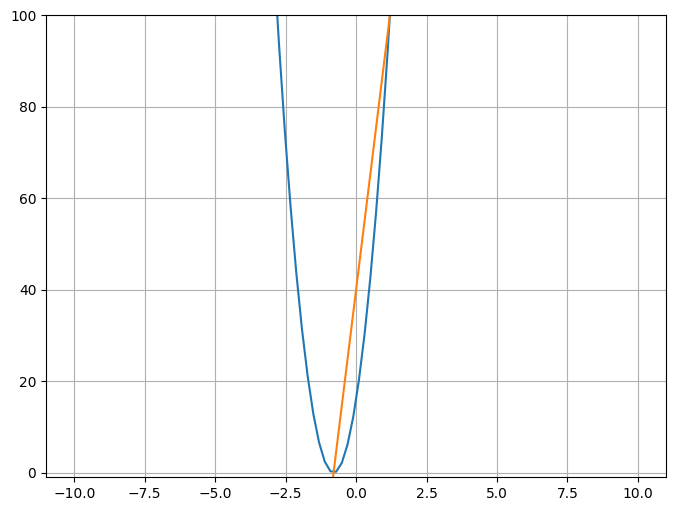

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(x, f(g(x)))
plt.plot(x, deriv_f_g(x), label='deriv f(g)')
plt.ylim(-1, 100)
# plt.xlim(-10, -5)
plt.grid();

$$f(g(x)) = (4 + 5x) ^ 2$$
$$f(g(x)) = \frac{∂f}{∂g} \frac{∂g}{∂x} = 50x + 40$$


Решение через вычислительный граф:

<table>
<tr>
<td><img src='https://drive.google.com/uc?id=1U4VSKpNmqElPEqu0qVPRN8yZf9NGHNVo'></td>
<td><br>

$$\frac{∂c}{∂c} = 1$$

<br>
$$c = b ^ 2$$
$$\frac{∂c}{∂b} = \frac{∂c}{∂c} \frac{∂c}{∂b} = 1 \cdot 2b = 1 \cdot 2 \cdot 9 = 18$$

<br>

$$b = a  + 4$$
$$\frac{∂c}{∂a} = \frac{∂c}{∂b} \frac{∂b}{∂a} = 18 \cdot 1 = 18$$

<br>


$$a = x \cdot 5$$
$$\frac{∂c}{∂x} = \frac{∂c}{∂a} \frac{∂a}{∂x} = 18 \cdot 5 = 90$$
</td>
</tr></table>


## Нейрон для повторения входа

### Один пример для обучения

#### Вручную

Давайте возьмем простую задачу - восстановление входа. Что поступает на вход сети, то мы и ожидаем на ее выходе - эту задачу решали на презентации.


$$y = σ(w_1 * x + w_0)$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# вычисление сигмоид функции
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [ ]:
# создание данных для обучения
X = np.array([[1]])
y = np.array([[1]]).T

# генерации случайных чисел для инициализации весов
np.random.seed(1)
weights = np.random.random((X.shape[1], 1))
bias = np.random.random((1, 1))

display(weights, bias)

array([[0.417022]])

array([[0.72032449]])

forward

In [ ]:
# сделаем предсказание
output = X * weights + bias
pred = sigmoid(output)
pred

array([[0.75719212]])

In [ ]:
# ошибка
(y - pred) ** 2

array([[0.05895567]])

<img src='https://drive.google.com/uc?id=1VkyG8HuNwUO7mzuZX47hFaV7mL2YdhWb' width=700>

Backward

[Ссылка](https://docs.google.com/presentation/d/1Sfj8l91QFkFA6kMCe4CStCRDH5-pmfnZc8AEe8ujudg/edit?usp=sharing) на презентацию.

**dL/dL**

$\frac{dL}{dL} = 1$

**dL/dsigma**

$Loss = (y - \sigma)^2$

<h3>$\frac{dL}{\sigma} = \frac{dL}{dL}\frac{dL}{d\sigma} = 2 \cdot (\sigma - y) = 2 \cdot(0.757 - 1) = -0.484$</h3>


**dL/db**

$y_{pred} = \sigma(output)$

<h3>$\frac{dL}{db} = \frac{dL}{d\sigma}\frac{d\sigma}{db} = -0.484 \cdot \sigma ( 1 - σ) = -0.484 \cdot (0.757 \cdot (1-0.757)) = -0.089$</h3>

**dL/da**

$b = w_0 + a$

<h3>$\frac{dL}{da} = \frac{dL}{db}\frac{db}{da} = -0.089 \cdot 1$</h3>

**dL/dw0**

$b = w_0 + a$

<h3>$\frac{dL}{dw_0} = \frac{dL}{db}\frac{db}{dw_0} = -0.089 \cdot 1$</h3>

**dL/dw1**

$a = w_1 \cdot x$

<h3>$\frac{dL}{dw_1} = \frac{dL}{da}\frac{da}{dw_1} = -0.089 \cdot x = -0.089 \cdot 1$</h3>



In [ ]:
# сделаем backprop
# dloss/dloss = 1
dsigm = 2 * (pred - y)
dsigm
db = dsigm * sigmoid_deriv(output)
db
da = 1 * db
da
dw0 = 1 * db
dw0
dw1 = da * X
dw1

array([[-0.08928153]])

In [ ]:
# обновим параметры
bias -= dw0
weights -= dw1

In [ ]:
sigmoid(np.dot(X, weights) + bias)

array([[0.78850036]])

#### Через keras

Создадим один нейрон, который ждет на выход один сигнал.

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
import tensorflow as tf
tf.random.set_seed(1)

model = Sequential([
    Dense(1, input_shape=(1,), activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_toy = tf.constant([1.0])
y_toy = tf.constant([1.0])

Чтобы детально поизучать метод обратного распространения ошибки нужно указать оптимизатор, возьмем SGD и фукнцию потерь, возьмем MSE.

In [ ]:
from keras.losses import MSE
from tensorflow.python.keras.optimizer_v2 import gradient_descent


optimizer =gradient_descent.SGD(learning_rate=1)
loss_fn = MSE

Задаем начальные веса такими же значениями, которые наблюдали на презентации.

In [ ]:
params = [np.empty(shape = (1,1), dtype = np.float32), np.empty(shape = (1,), dtype = np.float32)]
params[0][0] = 0.417
params[1][0] = 0.72

model.set_weights(params)
model.get_weights()

[array([[0.417]], dtype=float32), array([0.72], dtype=float32)]

Запускаем первый цикл прохода вперед и назад.

In [ ]:
for epoch in range(1):   
    with tf.GradientTape() as tape: 
        pred = model(X_toy)
        print('Prediction is', pred.numpy())

        loss_value = loss_fn(y_toy, pred)
        print('Loss is', loss_value.numpy())

        grads = tape.gradient(loss_value, model.trainable_weights) 
        print('Grad are', grads)
        
    optimizer.apply_gradients(zip(grads, model.trainable_weights)) 

Prediction is [[0.7571285]]
Loss is [0.05898658]
Grad are [<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.08932084]], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.08932084], dtype=float32)>]


In [ ]:
0.417 - 1 * -0.08932087

0.5063208699999999

In [ ]:
0.72 - 1 * -0.08932087

0.80932087

In [ ]:
model.get_weights()

[array([[0.50632083]], dtype=float32), array([0.80932087], dtype=float32)]

Вторая шаг обучения.

In [ ]:
for epoch in range(1):   
    with tf.GradientTape() as tape: 
        pred = model(X_toy)
        print('Prediction is', pred.numpy())

        loss_value = loss_fn(y_toy, pred)
        print('Loss is', loss_value.numpy())

        grads = tape.gradient(loss_value, model.trainable_weights) 
        print('Grad are', grads)
        
    optimizer.apply_gradients(zip(grads, model.trainable_weights)) 

Prediction is [[0.7884557]]
Loss is [0.04475098]
Grad are [<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.07056834]], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.07056834], dtype=float32)>]


In [ ]:
0.50632083 - 1 * -0.07056837

0.5768892000000001

In [ ]:
0.8093209 - 1 * -0.07056837

0.8798892700000001

In [ ]:
model.get_weights()

[array([[0.57688916]], dtype=float32), array([0.8798892], dtype=float32)]

Возьмем еще 10 итераций, чтобы модель была успешней

In [ ]:
for epoch in range(10):   
    with tf.GradientTape() as tape: 
        pred = model(X_toy)
        print('Prediction is', pred.numpy(), end=' | ')

        loss_value = loss_fn(y_toy, pred)
        print('Loss is', loss_value.numpy())

        grads = tape.gradient(loss_value, model.trainable_weights) 
        
    optimizer.apply_gradients(zip(grads, model.trainable_weights)) 

Prediction is [[0.81103945]] | Loss is [0.03570609]
Prediction is [[0.828156]] | Loss is [0.02953036]
Prediction is [[0.84163415]] | Loss is [0.02507974]
Prediction is [[0.85256594]] | Loss is [0.0217368]
Prediction is [[0.8616423]] | Loss is [0.01914285]
Prediction is [[0.8693217]] | Loss is [0.01707682]
Prediction is [[0.87592083]] | Loss is [0.01539564]
Prediction is [[0.88166547]] | Loss is [0.01400306]
Prediction is [[0.8867215]] | Loss is [0.01283202]
Prediction is [[0.89121336]] | Loss is [0.01183453]


In [ ]:
model(X_toy)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.8952366]], dtype=float32)>

### Несколько примеров для обучения

#### Вручную

In [ ]:
# создание данных для обучения
X = np.array([[0], [1]])
y = np.array([[0, 1]]).T

# генерации случайных чисел для инициализации весов
np.random.seed(1)
weights = np.random.random((X.shape[1], 1))
bias = np.random.random((1, 1))

display(weights, bias)

array([[0.417022]])

array([[0.72032449]])

Forward

In [ ]:
# сделаем предсказание
output = X * weights + bias
pred = sigmoid(output)
pred

array([[0.67267847],
       [0.75719212]])

In [ ]:
# ошибка
(y - pred) ** 2

array([[0.45249632],
       [0.05895567]])

In [ ]:
np.mean((y - pred) ** 2)

0.2557259944893541

Backward

<img src='https://drive.google.com/uc?id=19hNGpYFbZo0H65WrRAKb8p804ufyBVne' width=700>


[Ссылка](https://docs.google.com/presentation/d/1Sfj8l91QFkFA6kMCe4CStCRDH5-pmfnZc8AEe8ujudg/edit?usp=sharing) на презентацию.

Backward

[Ссылка](https://docs.google.com/presentation/d/1Sfj8l91QFkFA6kMCe4CStCRDH5-pmfnZc8AEe8ujudg/edit?usp=sharing) на презентацию.

**dL/dL**

$\frac{dL}{dL} = 1$

**dL/dsigma**

$Loss = (y - \sigma)^2$


<h3>$\frac{dL}{\sigma} = \frac{dL}{dL}\frac{dL}{d\sigma} = 2 \cdot (\sigma - y) = 2 \cdot(
    \begin{bmatrix} 0.67 \\ 0.757 \end{bmatrix}
     - 
     \begin{bmatrix} 0 \\ 1 \end{bmatrix}
     ) = \begin{bmatrix} 1.34 \\ -0.48 \end{bmatrix}$</h3>


**dL/db**

$y_{pred} = \sigma(output)$


<h3>$\frac{dL}{db} = \frac{dL}{d\sigma}\frac{d\sigma}{db} = 
\begin{bmatrix} 1.34 \\ -0.48 \end{bmatrix} \cdot \sigma ( 1 - σ) = 
\begin{bmatrix} 1.34 \\ -0.48 \end{bmatrix} \cdot
  (\begin{bmatrix} 0.67 \\ 0.757 \end{bmatrix}
  \cdot ( 1
  -\begin{bmatrix} 0.67 \\ 0.757 \end{bmatrix}))
   = \begin{bmatrix} 0.29 \\ -0.089 \end{bmatrix}$</h3>


**dL/da**

$b = w_0 + a$

<h3>$\frac{dL}{da} = \frac{dL}{db}\frac{db}{da} = \begin{bmatrix} 0.29 \\ -0.089 \end{bmatrix} \cdot 1$</h3>

**dL/dw0**

$b = w_0 + a$

<h3>$\frac{dL}{dw_0} = \frac{dL}{db}\frac{db}{dw_0} =  sum(\begin{bmatrix} 0.29 \\ -0.089 \end{bmatrix} \cdot 1) = 0.206$</h3>

**dL/dw1**

$a = w_1 \cdot x$

<h3>$\frac{dL}{dw_1} = \frac{dL}{da}\frac{da}{dw_1} = \begin{bmatrix} 0.29 \\ -0.089 \end{bmatrix} \cdot x = sum(\begin{bmatrix} 0.29 \\ -0.089 \end{bmatrix} \cdot \begin{bmatrix} 0 \\ 1 \end{bmatrix}) = -0.089$</h3>

In [ ]:
sigm = np.array([ 0.67 , 0.757])
y = np.array([ 0, 1]) 

In [ ]:
ds = 2 * (sigm - y)
ds

array([ 1.34 , -0.486])

In [ ]:
db = ds * (sigm * (1 - sigm))
db

array([ 0.296274  , -0.08940019])

In [ ]:
da = db * 1
da

array([ 0.296274  , -0.08940019])

In [ ]:
db, np.array([1])

(array([ 0.296274  , -0.08940019]), array([1]))

In [ ]:
dw0 = sum(db * np.array([1, 1]))
dw0

0.206873814

In [ ]:
dw1 = sum(da * np.array([0, 1]))
dw1

-0.08940018599999999

In [ ]:
# обновим параметры
bias -= dw0
weights -= dw1

In [ ]:
# сделаем предсказания
sigmoid(np.dot(X, weights) + bias)

array([[0.62561505],
       [0.73494784]])

#### Через keras

In [ ]:
X_toy = tf.constant([[0.0], [1.0]])
y_toy = tf.constant([[0.0], [1.0]])

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
import tensorflow as tf
tf.random.set_seed(1)

model = Sequential([
    Dense(1, input_shape=(1,), activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Чтобы детально поизучать метод обратного распространения ошибки нужно указать оптимизатор, возьмем SGD и фукнцию потерь, возьмем MSE.

In [ ]:
from keras.losses import MSE
from tensorflow.python.keras.optimizer_v2  import gradient_descent

optimizer = gradient_descent.SGD(learning_rate=1)
loss_fn = MSE

Задаем начальные веса такими же значениями, которые наблюдали на презентации.

In [ ]:
params = [np.empty(shape = (1,1), dtype = np.float32), np.empty(shape = (1,), dtype = np.float32)]
params[0][0] = 0.417
params[1][0] = 0.72

model.set_weights(params)
model.get_weights()

[array([[0.417]], dtype=float32), array([0.72], dtype=float32)]

Запускаем первый цикл прохода вперед и назад.

In [ ]:
for epoch in range(1):   
    with tf.GradientTape() as tape: 
        pred = model(X_toy)
        print('Prediction is', pred.numpy())

        loss_value = loss_fn(y_toy, pred)
        print('Loss is', loss_value.numpy())

        grads = tape.gradient(loss_value, model.trainable_weights) 
        print('Grad are', grads)
        
    optimizer.apply_gradients(zip(grads, model.trainable_weights)) 

Prediction is [[0.672607 ]
 [0.7571285]]
Loss is [0.45240018 0.05898658]
Grad are [<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.08932084]], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.20690447], dtype=float32)>]


In [ ]:
0.417 - 1 * -0.08932087

0.5063208699999999

In [ ]:
0.72 - 1 * 0.20690444

0.51309556

In [ ]:
model.get_weights()

[array([[0.50632083]], dtype=float32), array([0.51309556], dtype=float32)]

Вторая шаг обучения.

In [ ]:
for epoch in range(1):   
    with tf.GradientTape() as tape: 
        pred = model(X_toy)
        print('Prediction is', pred.numpy())

        loss_value = loss_fn(y_toy, pred)
        print('Loss is', loss_value.numpy())

        grads = tape.gradient(loss_value, model.trainable_weights) 
        print('Grad are', grads)
        
    optimizer.apply_gradients(zip(grads, model.trainable_weights)) 

Prediction is [[0.6255319]
 [0.7348589]]
Loss is [0.39129016 0.07029982]
Grad are [<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.10332089]], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.18973047], dtype=float32)>]


In [ ]:
0.50632083 - 1 * -0.10332085

0.6096416800000001

In [ ]:
0.5130956 - 1 * 0.18973051

0.32336509

In [ ]:
model.get_weights()

[array([[0.60964173]], dtype=float32), array([0.3233651], dtype=float32)]

Возьмем еще 10 итераций, чтобы модель была успешней

In [ ]:
for epoch in range(100):   
    with tf.GradientTape() as tape: 
        pred = model(X_toy)
        
        loss_value = loss_fn(y_toy, pred)

        grads = tape.gradient(loss_value, model.trainable_weights)

        if epoch % 10 == 0:
            print('Loss is', loss_value.numpy().mean()) 
        
    optimizer.apply_gradients(zip(grads, model.trainable_weights)) 

Loss is 0.20813453
Loss is 0.08836691
Loss is 0.049351156
Loss is 0.03268691
Loss is 0.02394043
Loss is 0.018684192
Loss is 0.015223084
Loss is 0.012791272
Loss is 0.01099851
Loss is 0.00962717


In [ ]:
model(X_toy)

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.10184455],
       [0.91801244]], dtype=float32)>

Создадим обучающие данные

In [ ]:
import numpy as np

X = np.array([[1], [3], [2], [10], [4], [7], [8]])
y = np.array([[3, 9, 6, 30, 12, 21, 24]]).T

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
import tensorflow as tf
tf.random.set_seed(4)

model = Sequential([
    Dense(1, input_shape=(1,), activation='relu')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.get_weights()

[array([[-0.19831574]], dtype=float32), array([0.], dtype=float32)]

In [ ]:
optimizer = gradient_descent.SGD()


for i in range(3):     
    with tf.GradientTape() as tape: 
        pred = model(X[[i, -i]])
        print('Prediction is', pred.numpy(), 'True is', y[[i, -i]])

        loss_value = MSE(y[[i, -i]], pred)
        print('Loss is', loss_value.numpy())

        grads = tape.gradient(loss_value, model.trainable_weights) 
        print('Grad are', grads )
        print('_' * 40)

    optimizer.apply_gradients(zip(grads, model.trainable_weights)) 

Prediction is [[0.]
 [0.]] True is [[3]
 [3]]
Loss is [9. 9.]
Grad are [<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.]], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>]
________________________________________
Prediction is [[0.]
 [0.]] True is [[ 9]
 [24]]
Loss is [ 81. 576.]
Grad are [<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.]], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>]
________________________________________
Prediction is [[0.]
 [0.]] True is [[ 6]
 [21]]
Loss is [ 36. 441.]
Grad are [<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.]], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>]
________________________________________


In [ ]:
model.get_weights()

[array([[-0.19831574]], dtype=float32), array([0.], dtype=float32)]

## Summary


Вот мы и разобрались, что такое метод обратого распространения ошибки.


<img src='https://drive.google.com/uc?&id=1e-43HiIHAqYuEQ4opVvcgiJaLPJ8QnpA' width=500>


Метод обратного распространения ошибки (backpropagation) используется для обучения нейронной сети

<img src='https://media3.giphy.com/media/csRkcj8ARJaRALGu40/giphy.gif?cid=ecf05e470wn9ay0umqibbaesquz6ai4l1l8p0tpdts9fqnuv&rid=giphy.gif&ct=g' width=300>


Метод обратного распространения ошибки (backpropagation) используется с помощью правила цепочки (chain rule)

<img src='https://drive.google.com/uc?id=1VkyG8HuNwUO7mzuZX47hFaV7mL2YdhWb' width=500>

Производная ошибки по ошибке = 1, а затем нужно брать частные производные до тех пор, пока не дойдем до весов



<img src='https://drive.google.com/uc?id=19hNGpYFbZo0H65WrRAKb8p804ufyBVne' width=500>

Нужно соблюдать размерность. Размерность сигнала узла на прямом проходе = размерность градиента узла на обратном проходе 